<img src="https://i.imgur.com/12tfKrD.png" alt="Alin">
</img>


# Demo RNN -- 張愛玲散文集AI二次創作

資料集: 張愛玲繁體中文小說 《傳奇》

爬蟲來源: [crawl_book](https://colab.research.google.com/drive/1f_HvQEvgkJPFc473TlA-I_3EmkThA2SR?usp=sharing)

程式碼參考: [Tensorflow](https://www.tensorflow.org/tutorials/text/text_generation)

本次資料集，著作權乃是張愛玲女士所擁有。**請勿將本次資料集散播、更改、用於非商業用途**。

> **資料集說明**

今年是張愛玲女士101年誕辰。張愛玲出生名門，曾就讀於香港大學和聖約翰大學，受過良好的中西教育。上海淪陷時期，陸續發表《沉香屑·第一爐香》、《傾城之戀》、《心經》、《金鎖記》等中、短篇小說，震動上海文壇。

這次訓練取張愛玲散文集《傳奇》作為訓練，《傳奇》收留五篇散文: 「留情」、「鴻鸞禧」、「紅玫瑰與白玫瑰」、「等」、「桂花蒸阿小悲秋」。其中以「紅玫瑰與白玫瑰」最為膾炙人口。

> **訓練步驟**

深度學習在訓練模型上有以下幾個重要的步驟:
1. 讀入相關封包
2. 取得資料集 
3. 資料前處理
4. 建立模型
5. 制定訓練計畫
6. 評估模型
7. 做預測

> **本次模型介紹 RNN**

![](https://i.imgur.com/FaY50C8.png)


我們來看看維度，很多人會搞不懂RNN的維度:

一個Seq通過RNN後的維度

* Input: (Seq,${originDim}$)
* RNN Neuron: 2048
* Output: (Seq,2048) if (return_sequence == True) else (1,2048)
![](https://i.imgur.com/9SVl6JR.png)

![](https://i.imgur.com/z4ElFIr.png)

> **把生成問題變成分類問題**

![](https://i.imgur.com/TBHKuf6.png)


In [23]:
# ****************************************
# **請勿將本次資料集散播、用於非學術用途**
# ****************************************

# 執行即代表同意將會合法、合理使用資料集
# 太多人同時存取可能會報cannot retrieve file error
# 點擊you may still be able to access 下面那個連結再自行上傳檔案即可

!gdown --id 1gMpt0CdlPjr1cR3HwDqumeKaucrSYhhe --output "./Eileen_Legendary.txt"

# !wget -O Eileen_Legendary.txt "http://140.115.82.54/NN/Recurrent/Eileen_Legendary.txt"

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1gMpt0CdlPjr1cR3HwDqumeKaucrSYhhe
To: /content/Eileen_Legendary.txt
100% 818k/818k [00:00<00:00, 164MB/s]


## 1. 讀入Package

In [24]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import os
import matplotlib.pyplot as plt

## 2. 取得資料集

In [25]:
# 作業之一就是試試看其他本小說

book = ""
with open("./Eileen_Legendary.txt","r",encoding="utf8") as file:
  for line in file:
    book += line

book_length = len(book)
unique_words = set(book)
print(f"張愛玲散文集共有 {book_length} 字詞")
print(f"包含了 {len(unique_words)} 個獨一無二的字 (含標點符號)\n")
print(book[0:500])

張愛玲散文集共有 274000 字詞
包含了 3665 個獨一無二的字 (含標點符號)

我自己從來沒想到需要辯白，但最近一年來常常被人議論到，似乎被列為文化漢奸之一，自己也弄得莫名其妙。我所寫的文章從來沒有涉及政治，也沒有拿過任何津貼。想想看我唯一的嫌疑要末就是所謂「大東亞文學者大會」第三屆曾經叫我參加，報上登出的名單內有我；雖然我寫了辭函去，（那封信我還記得，因為很短，僅只是：「承聘為第三屆大東亞文學者大會代表，謹辭。張愛玲謹上。」）報上仍舊沒有把名字去掉。
至於還有許多無稽的謾罵，甚而涉及我的私生活，可以辯駁之點本來非常多。而且即使有這種事實，也還牽涉不到我是否有漢奸嫌疑的問題；何況私人的事本來用不著向大眾剖白，除了對自己家的家長之外彷彿我沒有解釋的義務。所以一直緘默著。同時我也實在不願意耗費時間與精神去打筆墨官司，徒然攪亂心思，耽誤了正當的工作。但一直這樣沉默著，始終沒有闡明我的地位，給社會上一個錯誤的印象，我也覺得是對不起關心我的前途的人。所以在小說集重印的時候寫了這樣一段作為序。反正只要讀者知道了就是了。
※※※
《傳奇》裏面新收進的五篇，「留情」、「鴻鸞禧」、「紅玫瑰與白玫瑰」、「等」、「桂花蒸阿小悲秋」，初發表的時候有許多草率的地方，實在對讀者感到抱歉，這次


## 3. 資料前處理

文字前處理有一堆方法、作法:
* 切字
* 還原
* 清除特殊字符
* 清除不常見字符 (StopWord)


我這裡僅使用去除不常見的字(StopWord)

In [26]:
# 計算字數統計
words_count = {}
for w in book:
  if w in words_count:
    words_count[w] += 1
  else:
    words_count[w] = 1

words_count = sorted(words_count.items(),key=lambda x:x[1])

In [27]:
stop_word = 8
unique_words = [w_tup[0] for w_tup in words_count if w_tup[1]>stop_word]
print(f"去除次數小於{stop_word}的文字剩餘 : {len(unique_words)}")

去除次數小於8的文字剩餘 : 1973


In [28]:
print(f"原本張愛玲散文集共有 {book_length} 字詞")
print(f"去除不常出現的文字後")
book = [w for w in book if w in unique_words]
print(f"剩餘{len(book)}個字")

原本張愛玲散文集共有 274000 字詞
去除不常出現的文字後
剩餘268660個字


In [29]:
# 文字轉數字(index)
word_2_index = {word:index for index,word in enumerate(unique_words)}
index_2_word = {word_2_index[word]:word for word in word_2_index}

book_2_index = [word_2_index[w] for w in book]

print("原始文字 : ")
print(book[:40])
print("-"*40)
print("轉成index : ")
print({word_2_index[w] for w in book[:40]})

原始文字 : 
['我', '自', '己', '從', '來', '沒', '想', '到', '需', '要', '辯', '白', '，', '但', '最', '近', '一', '年', '來', '常', '常', '被', '人', '議', '論', '到', '，', '似', '乎', '被', '列', '為', '文', '化', '漢', '之', '一', '，', '自', '己']
----------------------------------------
轉成index : 
{1921, 1540, 1799, 1929, 1937, 659, 1428, 1558, 1053, 1954, 1955, 1188, 1958, 1968, 178, 1972, 1854, 1730, 1731, 1618, 1876, 1885, 1890, 1891, 1636, 99, 614, 1646, 1905, 1907, 1781}


In [30]:
def ind2word_seq(seq):
  return [index_2_word[i] for i in seq]

In [31]:
# 設定輸入模型長度
seq_len = 20
characters = tf.data.Dataset.from_tensor_slices(book_2_index)
# characters = characters.map(lambda w:word_2_index[w.item()])

sequences = characters.batch(seq_len+1,drop_remainder=True)

for seq in sequences.take(2):
  print(seq.shape)
  print(seq)
  print([index_2_word[i] for i in seq.numpy()])

(21,)
tf.Tensor(
[1954 1907 1876 1854 1958 1929 1890 1937  659 1921  614 1891 1972 1730
 1636 1558 1968 1885 1958 1731 1731], shape=(21,), dtype=int32)
['我', '自', '己', '從', '來', '沒', '想', '到', '需', '要', '辯', '白', '，', '但', '最', '近', '一', '年', '來', '常', '常']
(21,)
tf.Tensor(
[1646 1955 1053 1428 1937 1972 1799 1540 1646   99 1905 1618 1188  178
 1781 1968 1972 1907 1876 1942 1470], shape=(21,), dtype=int32)
['被', '人', '議', '論', '到', '，', '似', '乎', '被', '列', '為', '文', '化', '漢', '之', '一', '，', '自', '己', '也', '弄']


![](https://i.imgur.com/YMVMFEJ.png)


In [32]:
# 做input、target切割
def split_input_target(seq):
  input_txt = seq[:-1]
  target_txt = seq[1:]
  return input_txt,target_txt

split_input_target(list("Tensorflow"))

(['T', 'e', 'n', 's', 'o', 'r', 'f', 'l', 'o'],
 ['e', 'n', 's', 'o', 'r', 'f', 'l', 'o', 'w'])

![](https://i.imgur.com/YoHWLkf.png)


In [33]:
dataset = sequences.map(split_input_target)

for input_example,target_exaple in dataset.take(1):
  print("Input :", ind2word_seq(input_example.numpy()))
  print("Target:", ind2word_seq(target_exaple.numpy()))
  print("-"*50)
  print("Input :", input_example.numpy())
  print("Target:", target_exaple.numpy())

Input : ['我', '自', '己', '從', '來', '沒', '想', '到', '需', '要', '辯', '白', '，', '但', '最', '近', '一', '年', '來', '常']
Target: ['自', '己', '從', '來', '沒', '想', '到', '需', '要', '辯', '白', '，', '但', '最', '近', '一', '年', '來', '常', '常']
--------------------------------------------------
Input : [1954 1907 1876 1854 1958 1929 1890 1937  659 1921  614 1891 1972 1730
 1636 1558 1968 1885 1958 1731]
Target: [1907 1876 1854 1958 1929 1890 1937  659 1921  614 1891 1972 1730 1636
 1558 1968 1885 1958 1731 1731]


In [34]:
# 建立資料集
# Batch size
BATCH_SIZE = 64

BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True))

dataset

<BatchDataset element_spec=(TensorSpec(shape=(64, 20), dtype=tf.int32, name=None), TensorSpec(shape=(64, 20), dtype=tf.int32, name=None))>

## 4. 建立模型

![](https://i.imgur.com/TBHKuf6.png)

In [35]:
# 超參數
EMBEDDING_DIM = 512

# 使用 keras 建立一個非常簡單的 LSTM 模型
model = tf.keras.Sequential()

model.add(
  tf.keras.layers.Embedding(
    input_dim=len(unique_words), 
    output_dim=EMBEDDING_DIM
))

model.add(
  tf.keras.layers.LSTM(
    units=4096, 
    return_sequences=True, 
))

model.add(
  tf.keras.layers.LSTM(
    units=2048, 
    return_sequences=True,
))
  
model.add(
  tf.keras.layers.Dense(
      len(unique_words),activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 512)         1010176   
                                                                 
 lstm_2 (LSTM)               (None, None, 4096)        75513856  
                                                                 
 lstm_3 (LSTM)               (None, None, 2048)        50339840  
                                                                 
 dense_1 (Dense)             (None, None, 1973)        4042677   
                                                                 
Total params: 130,906,549
Trainable params: 130,906,549
Non-trainable params: 0
_________________________________________________________________


In [36]:
# 查看模型的輸入、輸出 shape
for input_example,target_exaple in dataset.take(1):
  predict_example = model(input_example)
  print(f"Model input shape : {input_example.shape}")
  print(f"Model output shape : {predict_example.shape}")
  print(f"Model target shape : {target_exaple.shape}")

Model input shape : (64, 20)
Model output shape : (64, 20, 1973)
Model target shape : (64, 20)


In [37]:
print("原本的中文字序列：")
[print(index_2_word[ind],end="") for ind in input_example[0].numpy()]
print()
print("-"*40)
print("輸入尚未訓練的model後獲得：")
print()

predict_words = tf.math.argmax(predict_example[0],-1)
[print(index_2_word[ind],end="") for ind in predict_words.numpy()]
print()

原本的中文字序列：
濟的關係嗎？」梁太太答道：「他並不是沒有
----------------------------------------
輸入尚未訓練的model後獲得：

衫章職摘繼廊偶偶余余謂謂謂謂誰誰封封��


## 5. 制定訓練計畫並訓練

* [sparse_categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/sparse_categorical_crossentropy) V.S. [categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/categorical_crossentropy)

```python=
# categorical_crossentropy
y_true = [[0, 1, 0], [0, 0, 1]]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
assert loss.shape == (2,)

# sparse_categorical_crossentropy
y_true = [1, 2]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
assert loss.shape == (2,)

```


In [38]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam")

In [39]:
EPOCHS = 10
history = model.fit(
    dataset, # 前面使用 tf.data 建構的資料集
    epochs=EPOCHS,
)

Epoch 1/10
199/199 [==============================] - 64s 306ms/step - loss: 6.0177
Epoch 2/10
199/199 [==============================] - 65s 322ms/step - loss: 5.2913
Epoch 3/10
199/199 [==============================] - 67s 335ms/step - loss: 4.8105
Epoch 4/10
199/199 [==============================] - 68s 338ms/step - loss: 4.4960
Epoch 5/10
199/199 [==============================] - 68s 337ms/step - loss: 4.2614
Epoch 6/10
199/199 [==============================] - 67s 337ms/step - loss: 4.0570
Epoch 7/10
199/199 [==============================] - 67s 337ms/step - loss: 3.8503
Epoch 8/10
199/199 [==============================] - 67s 337ms/step - loss: 3.6280
Epoch 9/10
199/199 [==============================] - 67s 337ms/step - loss: 3.3786
Epoch 10/10
199/199 [==============================] - 67s 337ms/step - loss: 3.0846


## 6. 衡量模型

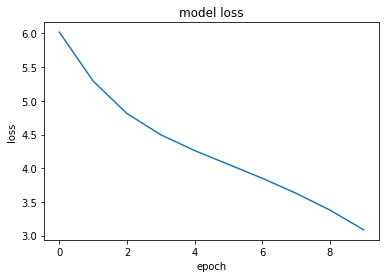

In [40]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [41]:
after_train_predictions = model(input_example)
after_sampled_indices = tf.argmax(after_train_predictions[0],1)

print("原本的中文字序列：")
[print(index_2_word[ind],end="") for ind in input_example[0].numpy()]
print()
print("-"*40)
print("輸入進訓練後的model後獲得：")
print()

[print(index_2_word[ind],end="") for ind in after_sampled_indices.numpy()]
print()

原本的中文字序列：
濟的關係嗎？」梁太太答道：「他並不是沒有
----------------------------------------
輸入進訓練後的model後獲得：

的，係嗎？」
太太道道：「你不不是不有錢


## 7. 做預測

![](https://i.imgur.com/YsOj6Mw.png)

在實際生成文字時，我們會想要增加一些隨機性。比如”天天出去” 不加入隨機 “天天天天” 如果我們全部輸出的字都是取softmax最大可能性，則一個訓練完美的model會把整本書給輸出出來。但是我們要的是，希望電腦在最大可能性的幾個字中隨機挑選一個字出來。

tf.random.categorical 會根據softmax機率後隨機挑選字，但是我們不希望因為模型很爛導致不合理的字被選中，因此我們會除上一個temperature來增加可能字的比重。

EX: "天天出去" 預測下一個字
1. 玩 : 0.3 
2. 天 : 0.1 
3. 浪 : 0.4 

"天"有的機率被印出，我們不希望。所以我們可以在每一個機率除上一個temperature(0.01)
1. 玩 : 30 
2. 天 : 10 
3. 浪 : 40 
原本"浪"跟"天"差0.3，除temperature後差30



In [42]:
# 預測文字，並把預測文字循環當作下一次的輸入

# 設定你的temperature
temperature = 0.01

def generateWords(input,words=500):
  [print(index_2_word[ind],end="") for ind in input]
  for i in range(words):
    next_input = tf.expand_dims(input,axis=0)
    predicts = model(next_input)
    predicts = predicts[:,-1,:]
    predicts /= temperature
    result = tf.random.categorical(
        predicts,num_samples=1
    )
    chinese_ind = tf.squeeze(result).numpy()
    print(index_2_word[chinese_ind],end="")
    input = input+[chinese_ind]
    input = input[-seq_len:]

In [43]:
init_seq = "紅玫瑰"
init_seq_ind = [word_2_index[w] for w in init_seq]
input = init_seq_ind[-seq_len:]

generateWords(input,500)

紅玫瑰，一個姿樂，蕊切地粹著一點水，瞅著她的一個印度的房子，處顏色的，像是澤的，致著一點，送了一個字，又是一個窩子。
資鸝求到了，她做不著，因為盧兆麟躊躇的家庭，她和他們的遠體的一個撒號的季節，齡公館裏的燈光，仔細是一個敦鳳的嬤節。她怎麼能夠使人能夠相信，她缺釋地說：「你別以為你現在的時候，你有個人，你喳帳上的女兒，你們還有一個不要緊的人。」
小寒道：「你不知道，我不是不知道，我們莫問我們對於你的。」
小寒道：「你不知道，我不是不知道，我就是這樣的！」
小寒道：「你不知道，我任果沒有層意。」
小寒道：「你不知道，我們到底是怎麼樣的一個人？」
小寒道：「你不知道，我沒有這麼一個人。」
小寒道：「你當心嗅著你的媒，你梁太太你也不是那樣的人！」
小寒道：「不知道，不是我說的。」
小寒道：「不知道，我就是不篤保的節思。」
小寒道：「你不知道，我們戰了這個，默不得，我也不懂得。」
小寒道：「你不知道，我趁不到我們那兒去。」
小寒道：「你不知道，我絹皮兒戶的難得聽見。」
小寒道：「我不知道，我列著這個不好，我們不能夠干涉！」
小寒道：「我不知道，我血待你不知道，我們掛著這個時候，我嫌你的，你肉能夠驗的。

In [44]:
# 不要執行這一個block
# import time
# while True:
#   time.sleep(5)
#   pass

## 作業2.1 (30%)

使用[爬蟲程式](https://colab.research.google.com/drive/1f_HvQEvgkJPFc473TlA-I_3EmkThA2SR?usp=sharing)來取得一個新的文本資料集，或是不管你從哪裡取得的資料集也可以(不要再張愛玲了，不限中英文)。然後丟入這個模型來看看AI生成文字的成果，將**結果**與**你的心得**(不是機器產生的心得)，貼上pdf。

請隨意修改本colab的模型與參數來達到更好的結果。

資料集越有趣越好，比如你可以去爬PTT文章來製作廢文產生器。去爬Dcard製作幻想文產生器。

In [45]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [46]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import os
import matplotlib.pyplot as plt

In [47]:
book = ""
with open("/content/gdrive/MyDrive/NCU/HW2/哈利波特1神秘的魔法石.txt","r",encoding="utf8") as file:
  for line in file:
    book += line

book_length = len(book)
unique_words = set(book)
print(f"哈利波特1-神秘的魔法石 {book_length} 字詞")
print(f"包含了 {len(unique_words)} 個獨一無二的字 (含標點符號)\n")
print(book[0:500])

哈利波特1-神秘的魔法石 156198 字詞
包含了 2858 個獨一無二的字 (含標點符號)

第１章 大難不死的男孩
家住水蠟樹街四號的德思禮夫婦總是得意地說他們是非常規矩的人家。拜託，拜託了。他們從來跟神秘古怪的事不沾邊，因為他們根本不相信那些邪門歪道。
威農德思禮先生在一家名叫格朗寧的公司做主管，公司生產鑽機。他高大魁梧，胖得幾乎連脖子都沒了，卻蓄著一臉大鬍子。德思禮太太是個瘦削的金髮女人。她的脖子幾乎比正常人長一倍。這樣每當她花許多時間隔著籬牆引頸而望、窺探左鄰右舍時，她的長脖子可就派上了大用場。德思禮夫婦有一個小兒子，名叫達力。在他們看來，人世間沒有比達力更好的孩子了。
德思禮一家什麼都不缺，但他們擁有一個秘密，他們最害怕的就是這秘密會被人發現。他們想，一旦有人發現波特一家的事，他們會承受不住的。波特太太是德思禮太太的妹妹，不過她們已經有好幾年不見面了。實際上，德思禮太太佯裝自己根本沒有這麼個妹妹，因為她妹妹和她那一無是處的妹夫與德思禮一家的為人處世完全不一樣。一想到鄰居們會說波特夫婦來到了，德思禮夫婦會嚇得膽顫心驚。他們知道波特也有個兒子，只是他們從來沒有見過。這孩子也是他們不與波特夫婦來往的一個很好的藉口，他們不願讓達力跟這種孩子廝混。
我們的故事開始於一個晦暗、陰


In [48]:
# 計算字數統計
words_count = {}
for w in book:
  if w in words_count:
    words_count[w] += 1
  else:
    words_count[w] = 1

words_count = sorted(words_count.items(),key=lambda x:x[1])

In [49]:
stop_word = 8
unique_words = [w_tup[0] for w_tup in words_count if w_tup[1]>stop_word]
print(f"去除次數小於{stop_word}的文字剩餘 : {len(unique_words)}")

去除次數小於8的文字剩餘 : 1375


In [50]:
print(f"原本哈利波特共有 {book_length} 字詞")
print(f"去除不常出現的文字後")
book = [w for w in book if w in unique_words]
print(f"剩餘{len(book)}個字")

原本哈利波特共有 156198 字詞
去除不常出現的文字後
剩餘151496個字


In [51]:
# 文字轉數字(index)
word_2_index = {word:index for index,word in enumerate(unique_words)}
index_2_word = {word_2_index[word]:word for word in word_2_index}

book_2_index = [word_2_index[w] for w in book]

print("原始文字 : ")
print(book[:40])
print("-"*40)
print("轉成index : ")
print({word_2_index[w] for w in book[:40]})

原始文字 : 
['第', '章', ' ', '大', '難', '不', '死', '的', '男', '孩', '\n', '家', '住', '水', '蠟', '樹', '街', '四', '號', '的', '德', '思', '禮', '夫', '婦', '總', '是', '得', '意', '地', '說', '他', '們', '是', '非', '常', '規', '的', '人', '家']
----------------------------------------
轉成index : 
{1176, 1180, 1186, 1187, 809, 683, 1069, 1333, 695, 1337, 1342, 1220, 1094, 969, 1354, 1101, 1358, 1105, 978, 1362, 1364, 1365, 1370, 1242, 1372, 1371, 1118, 1123, 486, 1254, 487, 872, 1258, 1133, 888, 1150}


In [52]:
def ind2word_seq(seq):
  return [index_2_word[i] for i in seq]

In [53]:
# 設定輸入模型長度
seq_len = 20
characters = tf.data.Dataset.from_tensor_slices(book_2_index)
# characters = characters.map(lambda w:word_2_index[w.item()])

sequences = characters.batch(seq_len+1,drop_remainder=True)

for seq in sequences.take(2):
  print(seq.shape)
  print(seq)
  print([index_2_word[i] for i in seq.numpy()])

(21,)
tf.Tensor(
[1180  486  888 1337 1094 1365 1133 1372 1123 1101 1370 1254 1258  978
  487  969  872 1069  695 1372 1176], shape=(21,), dtype=int32)
['第', '章', ' ', '大', '難', '不', '死', '的', '男', '孩', '\n', '家', '住', '水', '蠟', '樹', '街', '四', '號', '的', '德']
(21,)
tf.Tensor(
[1220 1186 1187  809 1118 1364 1333 1242 1354 1358 1371 1362 1364 1105
 1150  683 1372 1342 1254 1373 1374], shape=(21,), dtype=int32)
['思', '禮', '夫', '婦', '總', '是', '得', '意', '地', '說', '他', '們', '是', '非', '常', '規', '的', '人', '家', '。', '，']


In [54]:
# 做input、target切割
def split_input_target(seq):
  input_txt = seq[:-1]
  target_txt = seq[1:]
  return input_txt,target_txt

split_input_target(list("Tensorflow"))

(['T', 'e', 'n', 's', 'o', 'r', 'f', 'l', 'o'],
 ['e', 'n', 's', 'o', 'r', 'f', 'l', 'o', 'w'])

In [55]:
dataset = sequences.map(split_input_target)

for input_example,target_exaple in dataset.take(1):
  print("Input :", ind2word_seq(input_example.numpy()))
  print("Target:", ind2word_seq(target_exaple.numpy()))
  print("-"*50)
  print("Input :", input_example.numpy())
  print("Target:", target_exaple.numpy())

Input : ['第', '章', ' ', '大', '難', '不', '死', '的', '男', '孩', '\n', '家', '住', '水', '蠟', '樹', '街', '四', '號', '的']
Target: ['章', ' ', '大', '難', '不', '死', '的', '男', '孩', '\n', '家', '住', '水', '蠟', '樹', '街', '四', '號', '的', '德']
--------------------------------------------------
Input : [1180  486  888 1337 1094 1365 1133 1372 1123 1101 1370 1254 1258  978
  487  969  872 1069  695 1372]
Target: [ 486  888 1337 1094 1365 1133 1372 1123 1101 1370 1254 1258  978  487
  969  872 1069  695 1372 1176]


In [56]:
# 建立資料集
# Batch size
BATCH_SIZE = 64

BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True))

dataset

<BatchDataset element_spec=(TensorSpec(shape=(64, 20), dtype=tf.int32, name=None), TensorSpec(shape=(64, 20), dtype=tf.int32, name=None))>

In [57]:
# 超參數
EMBEDDING_DIM = 512

# 使用 keras 建立一個非常簡單的 LSTM 模型
model = tf.keras.Sequential()

model.add(
  tf.keras.layers.Embedding(
    input_dim=len(unique_words), 
    output_dim=EMBEDDING_DIM
))

model.add(
  tf.keras.layers.LSTM(
    units=4096, 
    return_sequences=True, 
))

model.add(
  tf.keras.layers.LSTM(
    units=2048, 
    return_sequences=True,
))
  
model.add(
  tf.keras.layers.Dense(
      len(unique_words),activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 512)         704000    
                                                                 
 lstm_4 (LSTM)               (None, None, 4096)        75513856  
                                                                 
 lstm_5 (LSTM)               (None, None, 2048)        50339840  
                                                                 
 dense_2 (Dense)             (None, None, 1375)        2817375   
                                                                 
Total params: 129,375,071
Trainable params: 129,375,071
Non-trainable params: 0
_________________________________________________________________


In [58]:
# 查看模型的輸入、輸出 shape
for input_example,target_exaple in dataset.take(1):
  predict_example = model(input_example)
  print(f"Model input shape : {input_example.shape}")
  print(f"Model output shape : {predict_example.shape}")
  print(f"Model target shape : {target_exaple.shape}")

Model input shape : (64, 20)
Model output shape : (64, 20, 1375)
Model target shape : (64, 20)


In [59]:
print("原本的中文字序列：")
[print(index_2_word[ind],end="") for ind in input_example[0].numpy()]
print()
print("-"*40)
print("輸入尚未訓練的model後獲得：")
print()

predict_words = tf.math.argmax(predict_example[0],-1)
[print(index_2_word[ind],end="") for ind in predict_words.numpy()]
print()

原本的中文字序列：
，大喊大叫，連帶跳往後退去。
哈利坐起來
----------------------------------------
輸入尚未訓練的model後獲得：

冰冰冰冰讀讀讀讀讀讀讀讀讀妙妙答彿父彿彿


In [60]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam")

In [61]:
EPOCHS = 20
history = model.fit(
    dataset, # 前面使用 tf.data 建構的資料集
    epochs=EPOCHS,
)

Epoch 1/20
112/112 [==============================] - 36s 296ms/step - loss: 6.0350
Epoch 2/20
112/112 [==============================] - 35s 307ms/step - loss: 5.2886
Epoch 3/20
112/112 [==============================] - 36s 322ms/step - loss: 4.7693
Epoch 4/20
112/112 [==============================] - 37s 324ms/step - loss: 4.3845
Epoch 5/20
112/112 [==============================] - 38s 332ms/step - loss: 4.0908
Epoch 6/20
112/112 [==============================] - 37s 332ms/step - loss: 3.8429
Epoch 7/20
112/112 [==============================] - 38s 335ms/step - loss: 3.6044
Epoch 8/20
112/112 [==============================] - 38s 333ms/step - loss: 3.3495
Epoch 9/20
112/112 [==============================] - 38s 335ms/step - loss: 3.0738
Epoch 10/20
112/112 [==============================] - 38s 335ms/step - loss: 2.7570
Epoch 11/20
112/112 [==============================] - 38s 333ms/step - loss: 2.3906
Epoch 12/20
112/112 [==============================] - 38s 335ms/step - lo

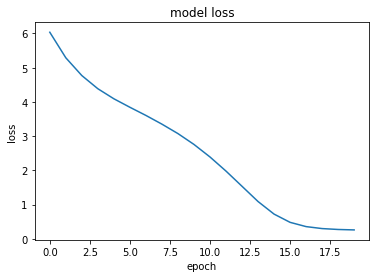

In [62]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [63]:
after_train_predictions = model(input_example)
after_sampled_indices = tf.argmax(after_train_predictions[0],1)

print("原本的中文字序列：")
[print(index_2_word[ind],end="") for ind in input_example[0].numpy()]
print()
print("-"*40)
print("輸入進訓練後的model後獲得：")
print()

[print(index_2_word[ind],end="") for ind in after_sampled_indices.numpy()]
print()

原本的中文字序列：
，大喊大叫，連帶跳往後退去。
哈利坐起來
----------------------------------------
輸入進訓練後的model後獲得：

「喊大叫，連帶跳往後退去。
哈利坐起來，


In [64]:
# 預測文字，並把預測文字循環當作下一次的輸入

# 設定你的temperature
temperature = 0.01

def generateWords(input,words=500):
  [print(index_2_word[ind],end="") for ind in input]
  for i in range(words):
    next_input = tf.expand_dims(input,axis=0)
    predicts = model(next_input)
    predicts = predicts[:,-1,:]
    predicts /= temperature
    result = tf.random.categorical(
        predicts,num_samples=1
    )
    chinese_ind = tf.squeeze(result).numpy()
    print(index_2_word[chinese_ind],end="")
    input = input+[chinese_ind]
    input = input[-seq_len:]

In [65]:
init_seq = "哈利波特"
init_seq_ind = [word_2_index[w] for w in init_seq]
input = init_seq_ind[-seq_len:]

generateWords(input,500)

哈利波特！」
他的心突然往下一沉，比他剛才出來了，他的生日裡還有一個再躲。」
「我就把你留在這兒吧，」哈利說，「我們必須充當棋子。」
「我不知道，先生。」
「我不知道它叫這個名字，先生。」海格說。
「我不是弗雷，我不知道你是誰了！」
「我想，我們一定離來了。」
「不管怎麼說……哈利，」巨蟒說，「你們可以肯定一定是學校裡的學院。我們需要學習的東西太多，就把隱形斗篷送給你的。」
「我……不想……穿……」
「別大聲嚷嚷，」他說，「我們必須充當棋子。」
「我不知道，先生。」
「我不知道它叫這個名字，先生。」海格說著，舉起望遠鏡，巨蟒從他們身邊走過去。
「好，」海格說，「裏邊是魁地奇球的是爆，」他們把隱形斗篷拉在身上。
「我們還是回家去比好，」他對著一隻子住前，佩妮阿姨說服達力坐到哈利身邊，想看這裡就是個盼望。
哈利覺得自己臉上頓時失去了血跡。
「……他還是有一個秘密。」
「我們只能猜測，」哈利說，「幸吧，我們現在必須這麼做，」鄧不利多說，「我們不知道這個洞有多深。把笛子給你們，想要在霍格華茲魔法學校就讀。隨信很強，我們需要一個人，這是一個好。」
「哦，」男孩說，「我聽說過這個洞有不同的動物，可是你們在